In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import alphalens

C:\Users\zhangyang01\AppData\Local\Continuum\anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [181]:
import sklearn.cluster
from sklearn.decomposition import PCA
import distance

In [85]:
stock = pd.read_excel('./data/assets.xlsx', sheet_name='equity')

In [86]:
# stock.head()

In [87]:
bond = pd.read_excel('./data/assets.xlsx', sheet_name='bond')

In [88]:
# bond.head()

In [89]:
oil = pd.read_excel('./data/assets.xlsx', sheet_name='oil')

In [90]:
# oil.head()

In [91]:
gold = pd.read_excel('./data/assets.xlsx', sheet_name='gold')

In [92]:
# gold.head()

In [93]:
house = pd.read_excel('./data/assets.xlsx', sheet_name='housing')

In [94]:
house.tail()

,House
2017-08-31,0.571
2017-09-30,0.473
2017-10-31,0.406
2017-11-30,0.390
2017-12-31,0.381


In [95]:
house['House'] = (1+house['House']/100.).cumprod()

In [96]:
house['House'].tail()

2017-08-31    1.530959
2017-09-30    1.538200
2017-10-31    1.544446
2017-11-30    1.550469
2017-12-31    1.556376
Name: House, dtype: float64

In [97]:
house['House'].resample('M').last().pct_change().tail()

2017-08-31    0.00571
2017-09-30    0.00473
2017-10-31    0.00406
2017-11-30    0.00390
2017-12-31    0.00381
Freq: M, Name: House, dtype: float64

In [98]:
money = pd.read_excel('./data/assets.xlsx', sheet_name='money')

In [99]:
# money.head()

In [215]:
df = stock.copy()
df = df.join(bond['0652.CS'], how='outer')
df = df.join(oil['Brent'], how='outer')
df = df.join(gold['Gold'], how='outer')
# df = df.join(house['House'], how='outer')
# df['bond'] = bond['0652.CS']
# df['oil'] = oil['Brent']
# df['gold'] = gold['Gold']
# df['house'] = house['House']
# df['money'] = money['H11025.CSI']

In [216]:
df = df.fillna(method='ffill').dropna()
# df = df.dropna()

In [217]:
df.tail()

,881001.WI,0652.CS,Brent,Gold
2018-01-23,4738.2899,95.9913,69.4,1337.1
2018-01-24,4757.4209,96.0056,69.4,1350.5
2018-01-25,4738.2000,96.0152,69.4,1350.5
2018-01-26,4743.2999,96.0248,69.4,1350.5
2018-01-29,4674.0651,96.0321,69.4,1350.5


In [218]:
ret_df = df.resample('M').last().pct_change()
# ret_df = df.pct_change()
ret_df = ret_df.dropna()

In [219]:
ret_df.tail()

,881001.WI,0652.CS,Brent,Gold
2017-09-30,0.012791,0.001405,0.082179,-0.014436
2017-10-31,0.011057,-0.007306,0.075938,-0.009752
2017-11-30,-0.029515,-0.005816,0.035534,0.006081
2017-12-31,-0.002693,-0.001681,0.050370,0.011192
2018-01-31,0.033463,-0.000403,0.040012,0.041651


In [220]:
# pct_df = ret_df.rank(pct=True)

In [221]:
# sgn_df = ret_df.copy()
# sgn_df[sgn_df > 0] = 1
# sgn_df[sgn_df < 0] = -1

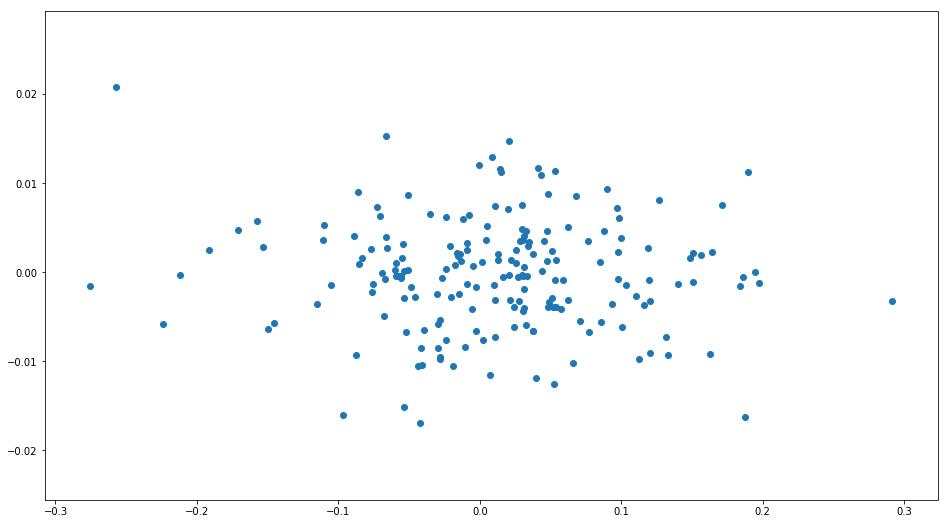

In [222]:
plt.figure(figsize=(16, 9))
plt.scatter(ret_df['881001.WI'], ret_df['0652.CS'])

In [223]:
def transition_matrix(labels, n):
    M = [[0]*n for _ in range(n)]
    for (i,j) in zip(labels, labels[1:]):
        M[i][j] += 1
    for row in M:
        m = sum(row)
        if m > 0:
            row[:] = [x*1./m for x in row]
    Mdf = pd.DataFrame(M, index=range(n), columns=range(n))
    return Mdf

In [224]:
affprop = sklearn.cluster.AffinityPropagation(damping=0.5, max_iter=200)
affprop.fit(ret_df)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [225]:
affprop.labels_

array([ 6,  0, 18,  1, 11, 15, 18,  8, 14, 15,  6,  2,  3, 16, 16,  6,  4,
       13, 18, 14, 15, 18, 18, 17,  5, 13,  4, 18, 14,  0, 14,  0,  8, 13,
       14,  4,  5,  4, 14, 15,  6,  4,  5, 13, 14, 13,  6,  2, 17,  6,  2,
        7,  3,  8, 17, 16, 17,  5,  7,  7,  2,  5,  7, 11,  4, 11,  7,  6,
        6, 12,  2,  8,  6, 12,  3,  4, 12, 17,  9,  1, 10, 16, 16,  0, 13,
       11,  3,  0, 11, 11, 12, 13,  5,  2, 17, 14,  6, 18,  8,  1,  8, 11,
       13,  6, 11,  8, 18,  3,  6, 18,  6, 14, 17,  8,  8,  9, 13, 15, 15,
       13,  5, 15, 17, 17, 14,  4, 18, 13, 15, 15, 11, 18, 17, 14, 17, 17,
        9,  2,  6, 17, 15,  3, 15, 13, 13, 15, 18, 17, 13, 17, 17, 17, 16,
       16, 16, 16,  0,  7,  5, 11, 14,  9,  1, 15, 11, 17, 16, 12,  6, 11,
        0,  3, 13, 16,  0, 18, 17,  3,  4, 13, 13, 15, 14, 15, 17,  6, 13,
       18, 18, 18, 18, 18], dtype=int64)

In [226]:
affprop.cluster_centers_

array([[  6.81978633e-02,   8.56576189e-03,   2.22383020e-01,
          2.17501265e-02],
       [ -8.60602652e-02,   9.03720500e-03,  -1.15270571e-01,
          5.78632617e-02],
       [  9.96189151e-02,   3.91166903e-03,   4.81407703e-02,
          8.05251641e-02],
       [  1.00060994e-02,  -1.45036448e-03,   7.69718087e-02,
         -6.12933711e-02],
       [ -6.59268085e-02,   2.75361054e-03,   1.02278356e-01,
         -3.24200913e-02],
       [  9.82612648e-02,   6.07631965e-03,   1.26263761e-01,
          3.00849457e-02],
       [  2.04147638e-02,  -2.44168363e-04,   1.05051857e-01,
          4.94159928e-02],
       [  1.97492192e-01,  -1.16736495e-03,  -6.34788635e-02,
          2.46768508e-02],
       [ -5.38554391e-02,  -2.86452720e-03,   2.11748634e-02,
          6.09593604e-02],
       [ -1.71010689e-01,   4.77049625e-03,  -8.54955681e-02,
         -8.27850877e-02],
       [ -2.57486290e-01,   2.07820238e-02,  -3.58426005e-01,
         -1.87848384e-01],
       [  1.62516679e

In [227]:
# pd.DataFrame(affprop.cluster_centers_, columns=ret_df.columns).to_excel('C:/Users/zhangyang01/Desktop/temp.xlsx')

In [228]:
# kmeans = sklearn.cluster.KMeans(n_clusters=4)
# kmeans.fit(ret_df)

In [229]:
# kmeans.labels_

In [230]:
# kmeans.cluster_centers_

# 收益率（百分位）分布

In [231]:
def rank_percentile(array):
    """
    返回s的最后一个元素在s中的分位值
    """
    s = pd.Series(array)
    s = s.rank(pct=True)
    return s.iloc[-1]

In [232]:
pct_df = ret_df.rolling(window=60).apply(lambda x: rank_percentile(x))
pct_df = pct_df.dropna()

In [233]:
pct_df.tail()

,881001.WI,0652.CS,Brent,Gold
2017-09-30,0.466667,0.583333,0.883333,0.383333
2017-10-31,0.433333,0.183333,0.850000,0.450000
2017-11-30,0.166667,0.266667,0.766667,0.583333
2017-12-31,0.383333,0.400000,0.800000,0.666667
2018-01-31,0.650000,0.483333,0.783333,0.833333


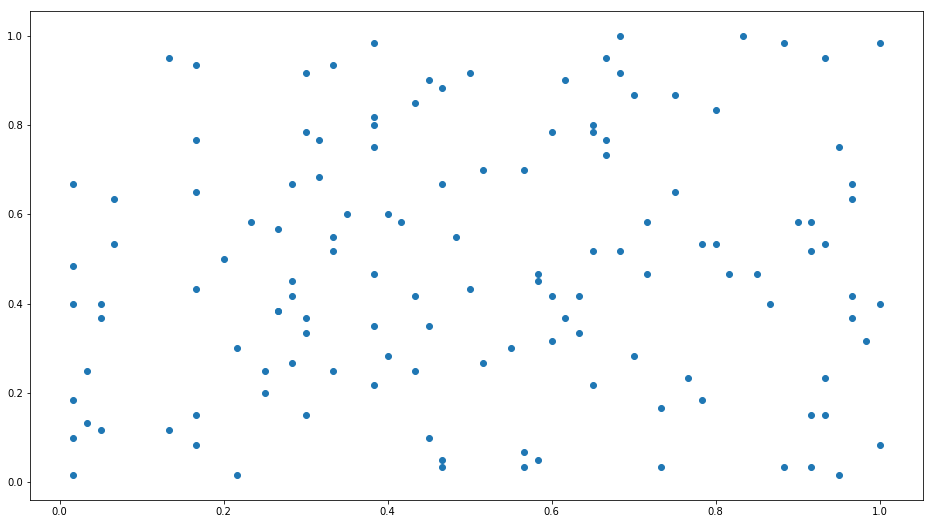

In [234]:
plt.figure(figsize=(16, 9))
plt.scatter(pct_df['881001.WI'], pct_df['Brent'])

In [235]:
pca = PCA()
pca.fit(pct_df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [236]:
pca.explained_variance_ratio_

array([ 0.35817932,  0.24978652,  0.23957362,  0.15246054])

In [237]:
tran_df = pca.transform(pct_df)

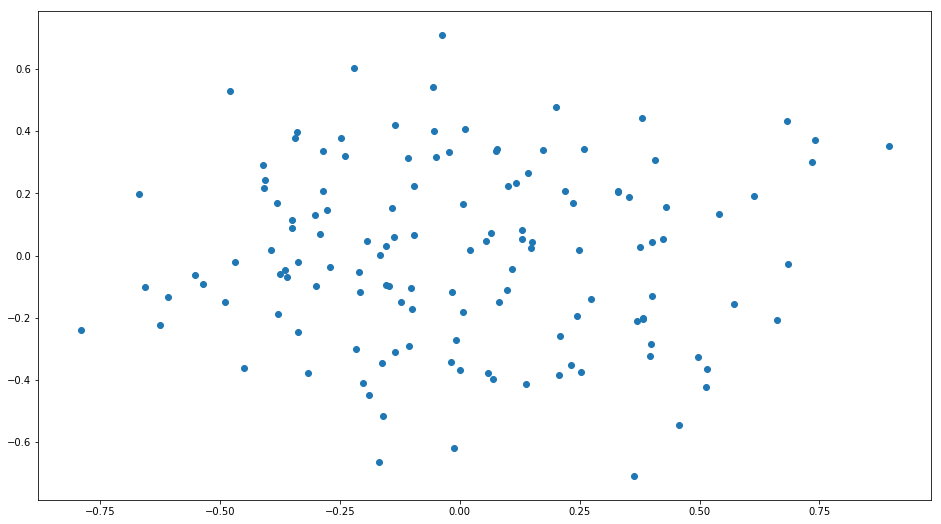

In [238]:
plt.figure(figsize=(16, 9))
plt.scatter(tran_df[:, 0], tran_df[:, 1])

In [239]:
affprop = sklearn.cluster.AffinityPropagation(damping=0.5, max_iter=200)
affprop.fit(pct_df)

AffinityPropagation(affinity='euclidean', convergence_iter=15, copy=True,
          damping=0.5, max_iter=200, preference=None, verbose=False)

In [240]:
affprop.labels_

array([ 7,  0,  2,  7,  1, 12,  0,  8,  2, 14, 12,  0, 10,  6,  3, 13, 14,
       12,  8,  3,  9,  3,  9,  9,  2, 11,  1,  1, 14,  1,  1,  4, 11,  2,
        6,  5,  4,  6, 13, 14, 10, 12,  8,  4, 11,  1, 12, 13,  5, 14,  4,
       14,  4,  5, 11, 11,  3,  6,  3,  3,  6,  2,  5,  7,  3,  4, 14, 12,
       11,  5,  4,  1,  0,  8,  4,  3,  8,  5, 11,  2,  7,  5,  1,  5,  9,
        6,  5,  8,  8,  6,  7,  8,  8,  8,  8,  7,  9, 13,  7,  0,  0,  4,
        3, 10,  4,  0,  7,  9, 10, 14,  0,  2, 13,  6,  9, 13, 14,  8,  1,
       12, 11, 11, 12, 12, 12,  8, 14, 11, 13, 14, 12, 14, 14], dtype=int64)

In [241]:
affprop.cluster_centers_

array([[ 0.96666667,  0.58333333,  0.66666667,  0.6       ],
       [ 0.8       ,  0.18333333,  0.53333333,  0.16666667],
       [ 0.68333333,  0.2       ,  0.91666667,  0.63333333],
       [ 0.25      ,  0.9       ,  0.25      ,  0.06666667],
       [ 0.28333333,  0.55      ,  0.26666667,  0.46666667],
       [ 0.3       ,  0.18333333,  0.33333333,  0.26666667],
       [ 0.68333333,  0.81666667,  0.51666667,  0.76666667],
       [ 0.91666667,  0.2       ,  0.15      ,  0.35      ],
       [ 0.65      ,  0.8       ,  0.21666667,  0.38333333],
       [ 0.56666667,  0.85      ,  0.06666667,  0.8       ],
       [ 0.03333333,  0.66666667,  0.13333333,  0.78333333],
       [ 0.41666667,  0.18333333,  0.58333333,  0.81666667],
       [ 0.23333333,  0.13333333,  0.58333333,  0.51666667],
       [ 0.46666667,  0.58333333,  0.88333333,  0.38333333],
       [ 0.38333333,  0.4       ,  0.8       ,  0.66666667]])

# 预测大类资产下期收益策略

In [242]:
# K = 10
W = 60
pred_df = pd.DataFrame(index=ret_df.index, columns=ret_df.columns)
for i, date in enumerate(ret_df.index):
    past_return = ret_df[ret_df.index <= date][-W:]
    if past_return.shape[0] >= W:
#         print date
        past_return = past_return.rank(pct=True, axis=1)
#         kmeans = sklearn.cluster.KMeans(n_clusters=K)
#         kmeans.fit(past_return)
        affprop = sklearn.cluster.AffinityPropagation()
        affprop.fit(past_return)
        label = affprop.labels_[-1]
#         print affprop.labels_.max()
        tran = transition_matrix(affprop.labels_, affprop.labels_.max()+1)
        prob = tran.loc[label].values
        if prob.sum() == 0:
            pred_df.loc[date] = affprop.cluster_centers_[label]
        else:
            pred = affprop.cluster_centers_.T.dot(prob)
            pred_df.loc[date] = pred

In [243]:
# plt.figure(figsize=(16, 9))
# plt.scatter(pred_df['881001.WI'], ret_df['881001.WI'].shift(-1))

In [244]:
pred_df.tail()

,881001.WI,0652.CS,Brent,Gold
2017-09-30,0.8,0.65,0.35,0.7
2017-10-31,0.857143,0.535714,0.464286,0.642857
2017-11-30,0.666667,0.583333,0.625,0.625
2017-12-31,0.708333,0.583333,0.666667,0.541667
2018-01-31,0.8125,0.5625,0.625,0.5


In [245]:
pred_df = pred_df.dropna()
pricing = df[df.index >= pred_df.index[0]].resample('M').last()

In [246]:
factor_df = pred_df.stack()
factor_df.index = factor_df.index.set_names(['date', 'asset'])

In [251]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor_df, pricing, quantiles=4, periods=(1,2,3), max_loss=0.35)

Dropped 20.3% entries from factor data (2.3% after in forward returns computation and 18.0% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


In [252]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_group=False)

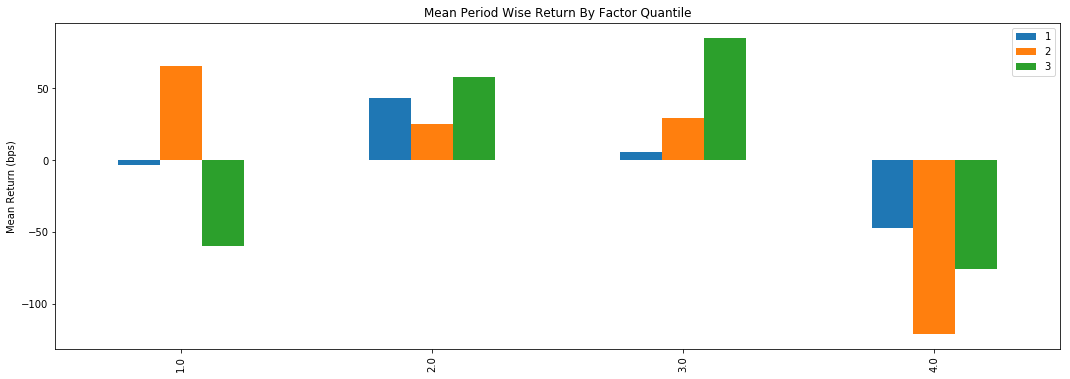

In [253]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)

Returns Analysis


,1,2,3
Ann. alpha,-0.397,-0.570,-0.129
beta,0.135,0.110,0.150
Mean Period Wise Return Top Quantile (bps),-47.102,-60.717,-25.391
Mean Period Wise Return Bottom Quantile (bps),-3.453,32.615,-19.965
Mean Period Wise Spread (bps),-38.736,-95.763,-7.775


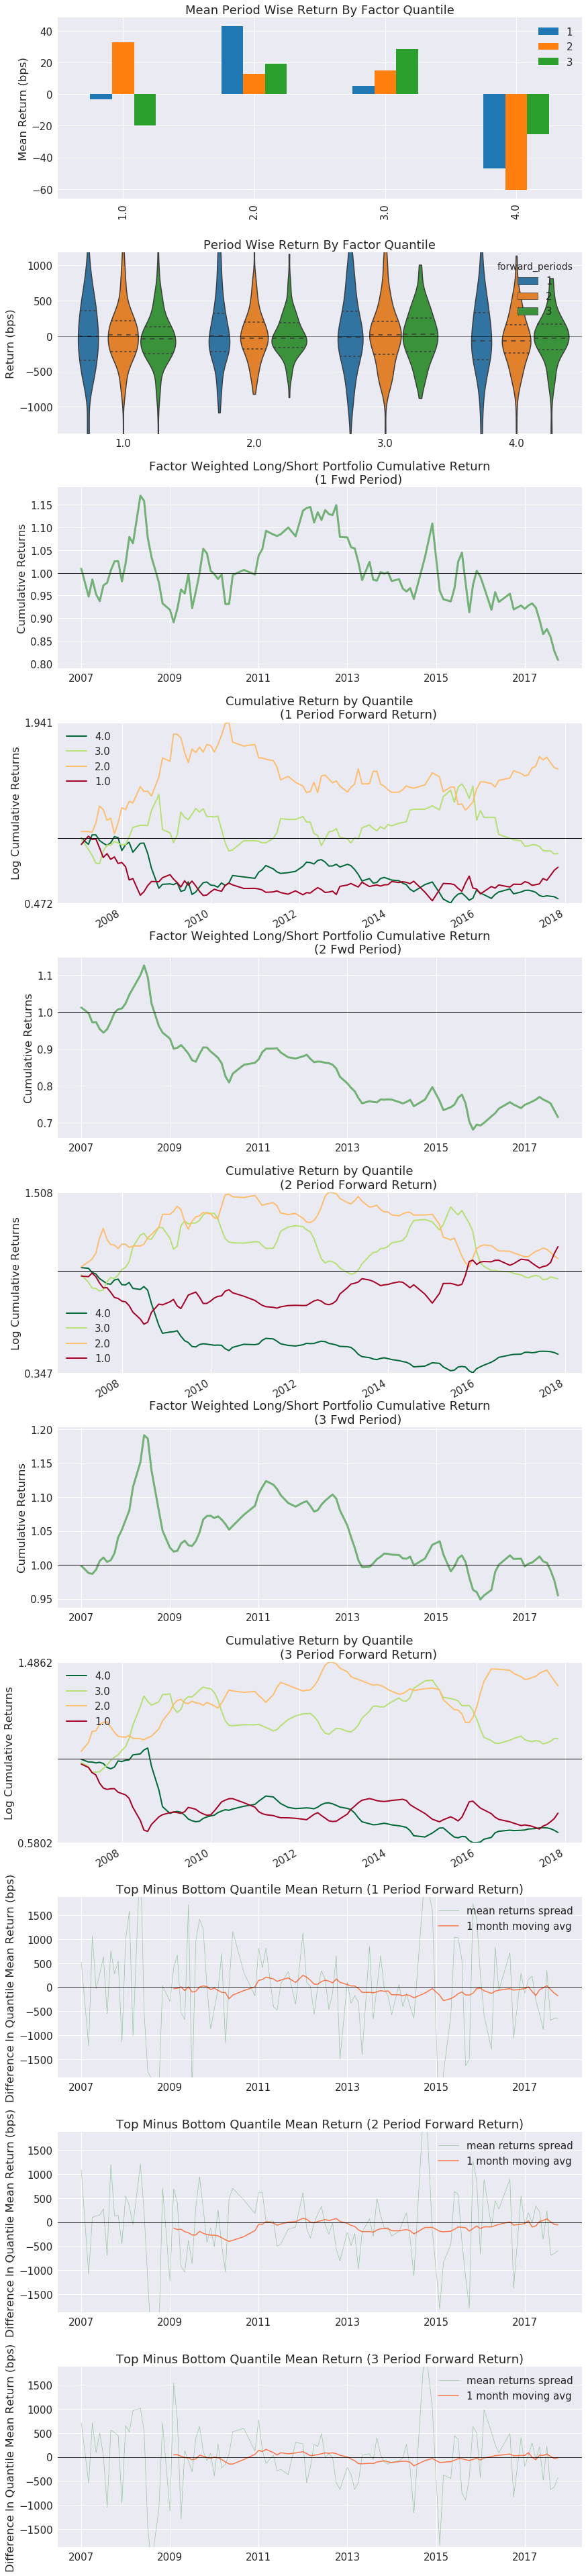

In [254]:
alphalens.tears.create_returns_tear_sheet(factor_data)

# 直接读入factor文件

In [255]:
pred_df = pd.read_excel('./data/factor.xlsx')

In [259]:
pred_df.shape

(47, 4)

In [261]:
pred_df.tail()

,881001.WI,0652.CS,Brent,Gold
2016-09-30,0.492722,0.830469,0.635928,0.688905
2016-12-31,0.723598,0.540011,0.774331,0.289981
2017-03-31,0.777655,0.644743,0.810258,0.201849
2017-06-30,0.781565,0.680368,0.433269,0.657135
2017-09-30,0.860078,0.269866,0.325546,0.697873


In [257]:
pricing = df[df.index >= pred_df.index[0]].resample('Q').last()

In [263]:
pricing.tail()

,881001.WI,0652.CS,Brent,Gold
2017-03-31,4409.2625,98.7775,52.20,1241.70
2017-06-30,4357.9826,97.8413,47.08,1243.25
2017-09-30,4621.7526,97.5080,57.02,1286.95
2017-12-31,4522.7222,96.0708,66.73,1296.50
2018-03-31,4674.0651,96.0321,69.40,1350.50


In [264]:
pricing = pricing.iloc[:-2]

In [265]:
factor_df = pred_df.stack()
factor_df.index = factor_df.index.set_names(['date', 'asset'])

In [266]:
factor_data = alphalens.utils.get_clean_factor_and_forward_returns(factor_df, pricing, quantiles=4, periods=(1,2,3))

Dropped 8.5% entries from factor data (6.4% after in forward returns computation and 2.1% in binning phase). Set max_loss=0 to see potentially suppressed Exceptions.


In [267]:
mean_return_by_q, std_err_by_q = alphalens.performance.mean_return_by_quantile(factor_data, by_group=False)

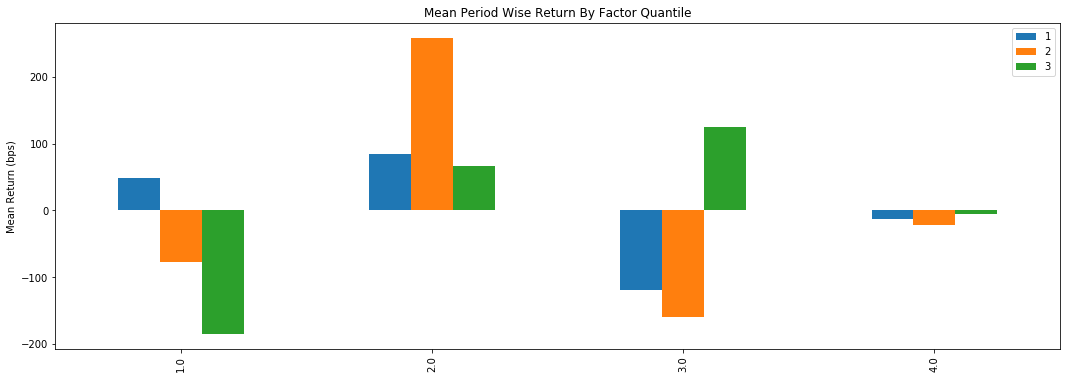

In [268]:
alphalens.plotting.plot_quantile_returns_bar(mean_return_by_q)

Returns Analysis


,1,2,3
Ann. alpha,-0.791,-0.762,-0.876
beta,0.250,0.028,0.237
Mean Period Wise Return Top Quantile (bps),-12.943,-10.973,-2.004
Mean Period Wise Return Bottom Quantile (bps),48.498,-38.826,-62.109
Mean Period Wise Spread (bps),-61.441,0.104,1.007


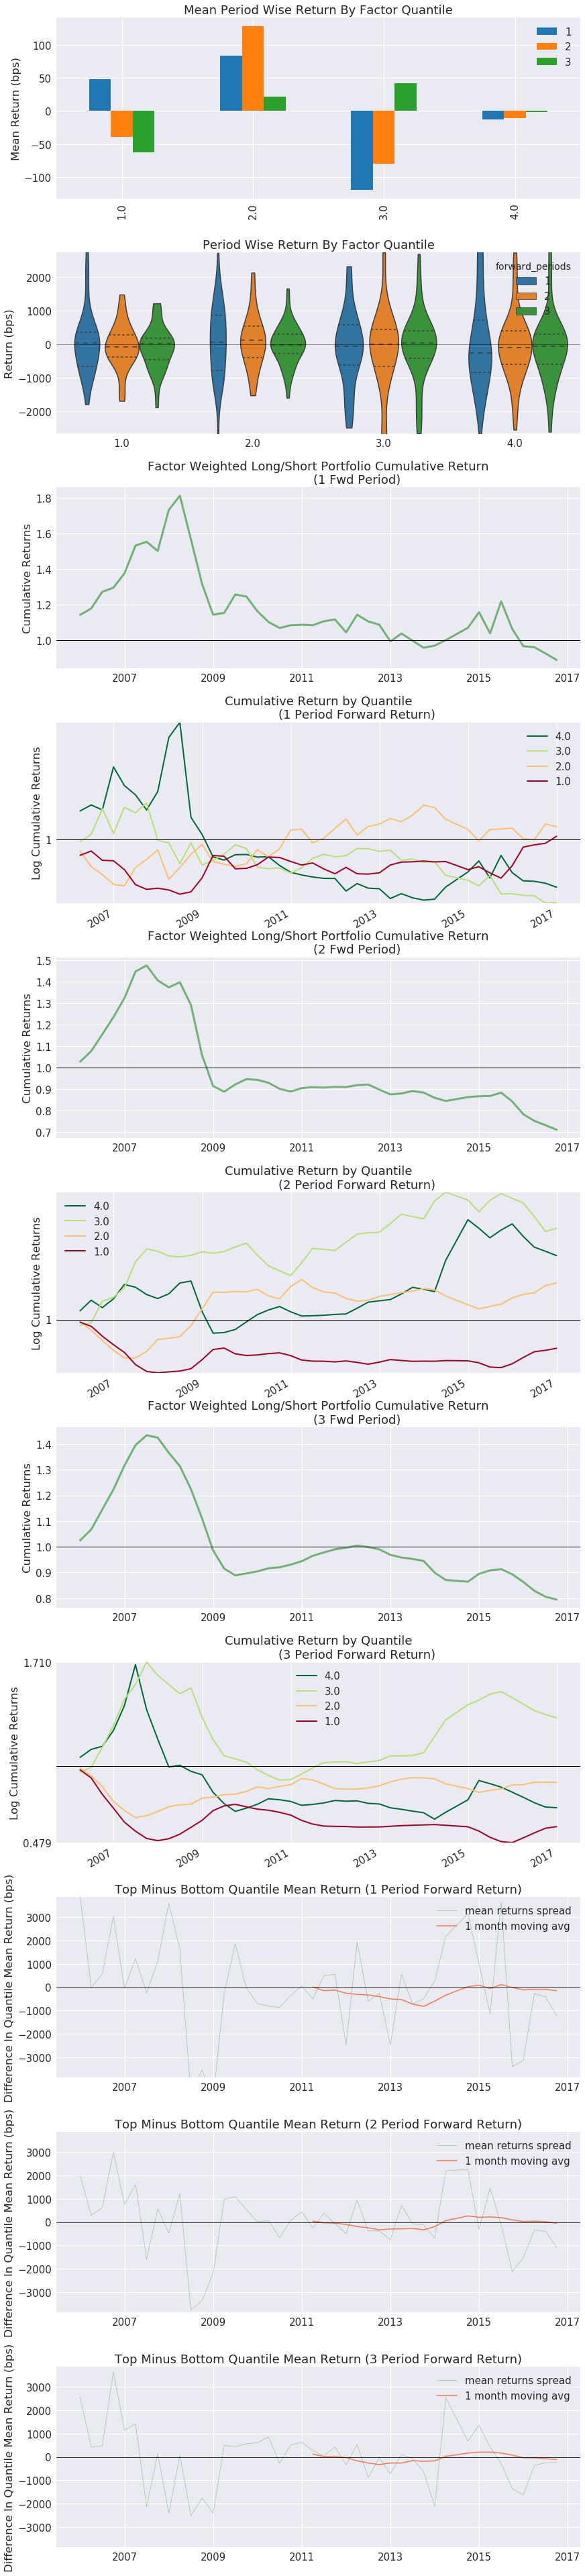

In [269]:
alphalens.tears.create_returns_tear_sheet(factor_data)